## Resources 
https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

https://keras.io/examples/vision/mnist_convnet/

https://keras.io/about/

https://keras.io/guides/sequential_model/

https://keras.io/api/

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import utils
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Rescaling, MaxPooling2D, Dropout

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
im_width = x_test.shape[1]
im_height = x_test.shape[2]
input_shape = (im_width, im_height,1)
num_classes = 10 #10 possible outcomes
n_test = x_test.shape[0]
n_train = x_train.shape[0]

x_train =x_train.astype('float32')
x_test = x_test.astype('float32')

y_train = utils.to_categorical(y_train, num_classes) #convert number to column vector with 1 in correct collumn
y_test = utils.to_categorical(y_test, num_classes)



The shape of the image data is : (60000, 28, 28)
The expected results are : [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


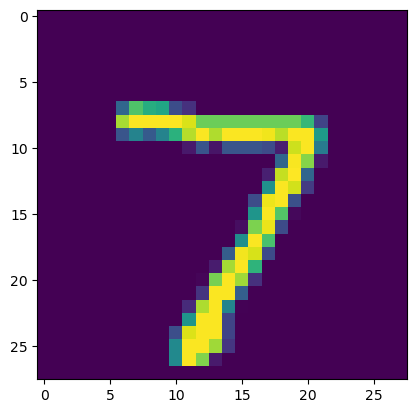

The expected results are : [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


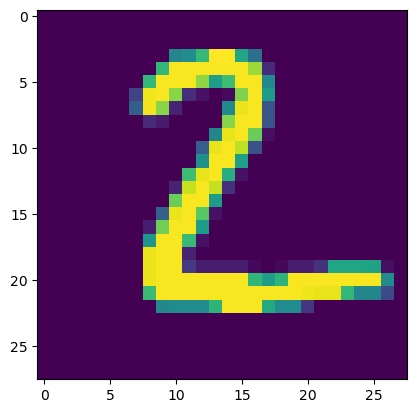

The expected results are : [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


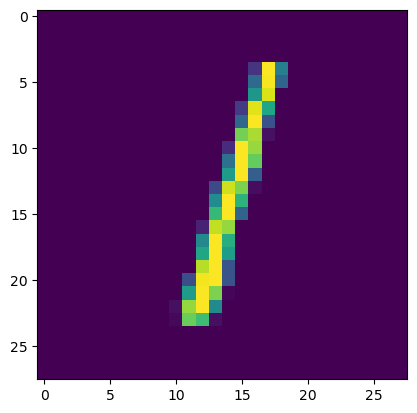

The expected results are : [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


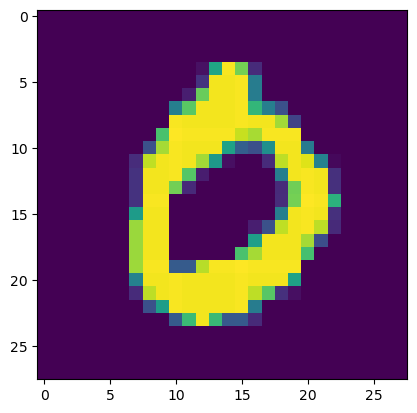

The expected results are : [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


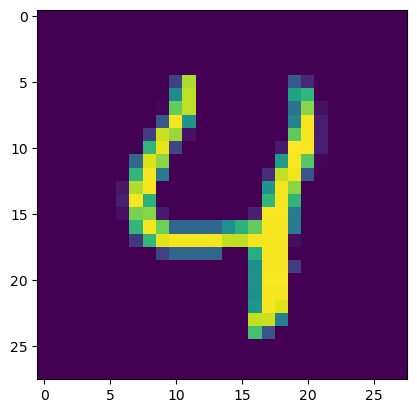

The expected results are : [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


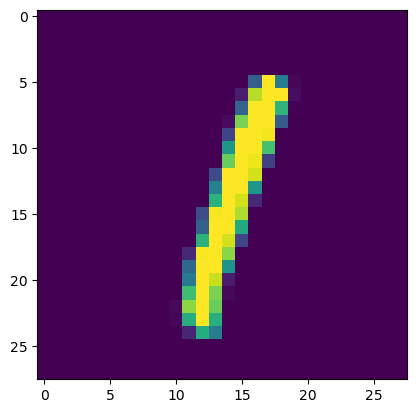

The expected results are : [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


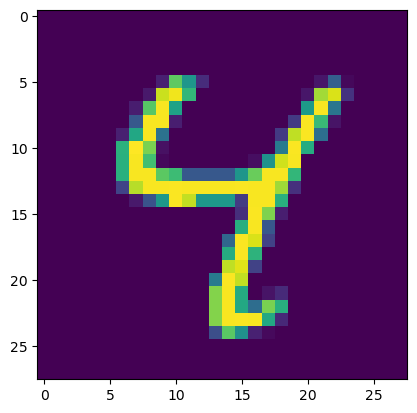

The expected results are : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


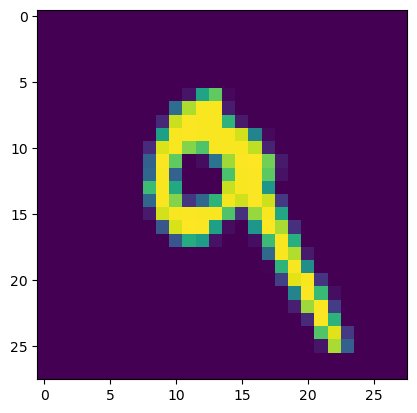

The expected results are : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


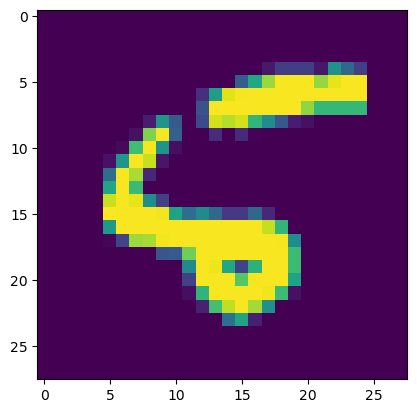

The expected results are : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


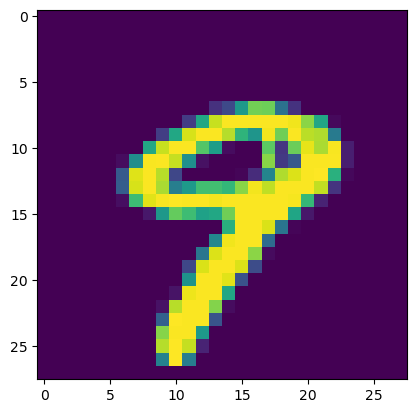

In [3]:
print('The shape of the image data is :',x_train.shape)
for i in range(10):
    plt.imshow(x_test[i])
    print('The expected results are :', y_test[i])
    plt.show()

In [4]:
validation_split=0.2
epochs=100
batch_size=600
loss='binary_crossentropy'
optimizer='adam'
metrics=['accuracy']

Want to change shape of input to (N_samples, N_pixles), and normalise x such that all values are between 0 and 1.


Change y to be column vector $Y_i$ for i = 0, ..9 with $Y_i=0$ for $i\neq y$ and $Y_i=1$ for $i = y$. 

In [5]:
model = Sequential([
    Input(shape=input_shape),
    Flatten(),
    Rescaling(1./255),
    Dense(30,input_shape=(im_width * im_height,), activation='relu'),
    Dense(10, activation='sigmoid'),
    
])
model.compile(loss=loss, optimizer=optimizer, metrics=metrics)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 rescaling (Rescaling)       (None, 784)               0         
                                                                 
 dense (Dense)               (None, 30)                23550     
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________


In [6]:
history = model.fit(x_train, y_train, validation_split=validation_split,epochs=epochs, batch_size=batch_size)

Epoch 1/100
80/80 [==============================] - 2s 13ms/step - loss: 0.3215 - accuracy: 0.4506 - val_loss: 0.1942 - val_accuracy: 0.7863
Epoch 2/100
80/80 [==============================] - 1s 10ms/step - loss: 0.1604 - accuracy: 0.8105 - val_loss: 0.1264 - val_accuracy: 0.8599
Epoch 3/100
80/80 [==============================] - 1s 11ms/step - loss: 0.1170 - accuracy: 0.8590 - val_loss: 0.0989 - val_accuracy: 0.8861
Epoch 4/100
80/80 [==============================] - 1s 8ms/step - loss: 0.0964 - accuracy: 0.8816 - val_loss: 0.0843 - val_accuracy: 0.8977
Epoch 5/100
80/80 [==============================] - 1s 8ms/step - loss: 0.0845 - accuracy: 0.8922 - val_loss: 0.0758 - val_accuracy: 0.9074
Epoch 6/100
80/80 [==============================] - 1s 7ms/step - loss: 0.0771 - accuracy: 0.8997 - val_loss: 0.0701 - val_accuracy: 0.9110
Epoch 7/100
80/80 [==============================] - 1s 10ms/step - loss: 0.0719 - accuracy: 0.9044 - val_loss: 0.0661 - val_accuracy: 0.9148
Epoch 8/1

Epoch 59/100
80/80 [==============================] - 1s 12ms/step - loss: 0.0214 - accuracy: 0.9728 - val_loss: 0.0296 - val_accuracy: 0.9610
Epoch 60/100
80/80 [==============================] - 1s 9ms/step - loss: 0.0211 - accuracy: 0.9732 - val_loss: 0.0298 - val_accuracy: 0.9623
Epoch 61/100
80/80 [==============================] - 1s 8ms/step - loss: 0.0207 - accuracy: 0.9736 - val_loss: 0.0293 - val_accuracy: 0.9621
Epoch 62/100
80/80 [==============================] - 1s 7ms/step - loss: 0.0205 - accuracy: 0.9743 - val_loss: 0.0292 - val_accuracy: 0.9617
Epoch 63/100
80/80 [==============================] - 1s 8ms/step - loss: 0.0202 - accuracy: 0.9745 - val_loss: 0.0292 - val_accuracy: 0.9628
Epoch 64/100
80/80 [==============================] - 1s 8ms/step - loss: 0.0199 - accuracy: 0.9746 - val_loss: 0.0292 - val_accuracy: 0.9613
Epoch 65/100
80/80 [==============================] - 0s 5ms/step - loss: 0.0197 - accuracy: 0.9757 - val_loss: 0.0289 - val_accuracy: 0.9618
Epoch

In [7]:
modelconv = Sequential(
    [
        Input(shape=input_shape),
        Rescaling(1./255.),
        Conv2D(32, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dropout(0.5),
        Dense(num_classes, activation="softmax"),
    ]
)

modelconv.summary()
modelconv.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)             

In [8]:
historyconv = modelconv.fit(x_train, y_train, validation_split=validation_split,epochs=20, batch_size=batch_size)

Epoch 1/20
80/80 [==============================] - 9s 105ms/step - loss: 0.2805 - accuracy: 0.4798 - val_loss: 0.1129 - val_accuracy: 0.8643
Epoch 2/20
80/80 [==============================] - 8s 101ms/step - loss: 0.0910 - accuracy: 0.8717 - val_loss: 0.0496 - val_accuracy: 0.9431
Epoch 3/20
80/80 [==============================] - 8s 98ms/step - loss: 0.0546 - accuracy: 0.9294 - val_loss: 0.0339 - val_accuracy: 0.9609
Epoch 4/20
80/80 [==============================] - 8s 102ms/step - loss: 0.0415 - accuracy: 0.9490 - val_loss: 0.0278 - val_accuracy: 0.9693
Epoch 5/20
80/80 [==============================] - 8s 101ms/step - loss: 0.0350 - accuracy: 0.9577 - val_loss: 0.0236 - val_accuracy: 0.9746
Epoch 6/20
80/80 [==============================] - 8s 98ms/step - loss: 0.0308 - accuracy: 0.9638 - val_loss: 0.0218 - val_accuracy: 0.9765
Epoch 7/20
80/80 [==============================] - 8s 97ms/step - loss: 0.0275 - accuracy: 0.9681 - val_loss: 0.0198 - val_accuracy: 0.9789
Epoch 8/2

In [9]:
scoreconv = modelconv.evaluate(x_test, y_test, verbose=0)
print("Conv Test loss:", scoreconv[0])
print("Conv Test accuracy:", scoreconv[1])
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Conv Test loss: 0.00969147402793169
Conv Test accuracy: 0.9884999990463257
Test loss: 0.027078192681074142
Test accuracy: 0.9663000106811523


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


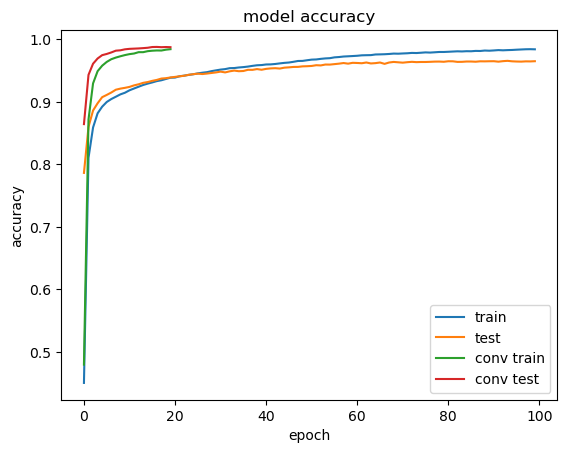

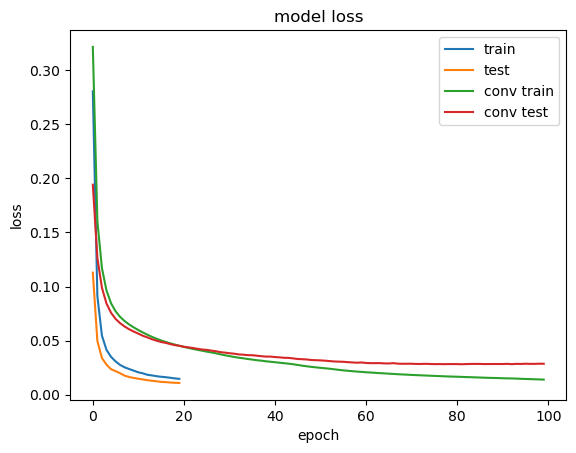

In [10]:
# list all data in history
print(historyconv.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(historyconv.history['accuracy'])
plt.plot(historyconv.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test','conv train', 'conv test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(historyconv.history['loss'])
plt.plot(historyconv.history['val_loss'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test','conv train', 'conv test'], loc='upper right')
plt.show()

In [11]:
n_train_red = 100
x_train_red = x_train[:n_train_red,:,:];
y_train_red = y_train[:n_train_red,:]
print(x_train_red.shape)

(100, 28, 28)


In [12]:
modelred = Sequential([
    Input(shape=input_shape),
    Flatten(),
    Rescaling(1./255),
    Dense(30,input_shape=(im_width * im_height,), activation='relu'),
    Dense(10, activation='sigmoid'),
    
])
modelred.compile(loss=loss, optimizer=optimizer, metrics=metrics)
modelred.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 rescaling_2 (Rescaling)     (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 30)                23550     
                                                                 
 dense_4 (Dense)             (None, 10)                310       
                                                                 
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________


In [13]:
historyred = modelred.fit(x_train_red, y_train_red, validation_split=validation_split,epochs=20, batch_size=20)

Epoch 1/20
4/4 [==============================] - 1s 76ms/step - loss: 0.6385 - accuracy: 0.1500 - val_loss: 0.5630 - val_accuracy: 0.2500
Epoch 2/20
4/4 [==============================] - 0s 11ms/step - loss: 0.5440 - accuracy: 0.1875 - val_loss: 0.4803 - val_accuracy: 0.3000
Epoch 3/20
4/4 [==============================] - 0s 14ms/step - loss: 0.4691 - accuracy: 0.2250 - val_loss: 0.4095 - val_accuracy: 0.3500
Epoch 4/20
4/4 [==============================] - 0s 10ms/step - loss: 0.4054 - accuracy: 0.2500 - val_loss: 0.3543 - val_accuracy: 0.3000
Epoch 5/20
4/4 [==============================] - 0s 10ms/step - loss: 0.3551 - accuracy: 0.2875 - val_loss: 0.3175 - val_accuracy: 0.2500
Epoch 6/20
4/4 [==============================] - 0s 11ms/step - loss: 0.3191 - accuracy: 0.3375 - val_loss: 0.2927 - val_accuracy: 0.3500
Epoch 7/20
4/4 [==============================] - 0s 10ms/step - loss: 0.2925 - accuracy: 0.4250 - val_loss: 0.2749 - val_accuracy: 0.4000
Epoch 8/20
4/4 [===========

In [14]:
scorered = modelred.evaluate(x_test, y_test, verbose=0)
print("Test loss:", scorered[0])
print("Test accuracy:", scorered[1])

Test loss: 0.23878325521945953
Test accuracy: 0.5616000294685364
